In [1]:
# Importa as bibliotecas necessárias
import numpy as np # utilizada para calcular estatísticas em arrays e listas
import seaborn as sns # utilizada para criarmos visualizações gráficas
import random # utilizada para gerar eventos aleatórios
import matplotlib.pyplot as plt # utilizada para criarmos visualizações gráficas

In [2]:
# Cria função para simular um álbum
def simular_album(sticker_total,stickers_in_pack,cost_of_pack):
    """
    Calcula um cenário aleatório de custos para completar um álbum de figurinhas.
    
    Argumentos:
    
        sticker_total: Número de figurinhas únicas disponíveis para colecionar
        
        stickers_in_pack: Número de figurinhas em um determinado pacote
        
        cost_of_pack: Custo de cada pacote
        
    Retorna:
        
        dicionário: '{Pacotes Comprados:int,Repetidas:int}'
    
    """
    # Inicia o número de pacotes comprados
    packs_bought = 0
    # Lista contendo o número identificador de cada figurinha colecionada
    stickers_collected = []
    # Lista contendo o número identificador de cada figurinha repetida colecionada
    repeated_list = []
    # Lista contendo o número identificador de cada figurinha que ainda não possuímos
    stickers_needed = list(range(1,sticker_total+1))
      
       
    # Itera até o número de figurinhas necessárias para completar o álbum ser igual a 0
    while len(stickers_needed) > 0:
        # Compra um pacote
        packs_bought += 1
        # Itera através das figurinhas individuais do determinado pacote
        for i in range(stickers_in_pack):
            # Número identificador da figurinha é selecionado aleatoriamente entre 1 e o número de figurinhas no álbum
            sticker_number = random.randint(1,sticker_total)
            # Caso a figurinha não esteja em nossa coleção, adicionamos seu identificador
            # à lista de colecionadas e removemos o seu identificador da lista de figurinhas que não possuímos
            if sticker_number not in stickers_collected:
                stickers_collected.append(sticker_number)
                stickers_needed.remove(sticker_number)
            # Caso a figurinha em questão já faça parte da coleção, adicionamos à lista de repetidas
            else:
                repeated_list.append(sticker_number)
            
    # Retorna o número final de pacotes comprados, quantas figurinhas repetidas ainda temos ao fim da coleção e o valor total gasto
    return {'Pacotes Comprados':packs_bought,'Repetidas':len(repeated_list),'Custo Total':packs_bought*cost_of_pack}

In [3]:
##### Simulação de 1 cenário
print(simular_album(670,5,4))

{'Pacotes Comprados': 1117, 'Repetidas': 4915, 'Custo Total': 4468}


In [4]:
# Cria função para realizar a simulação de Monte Carlo
def run_Monte_Carlo_Stickers(n,params):
    """
    Gera n cenários com base na função simular_album e seus respectivos parâmetros.
    
    Argumentos:
    
        n: int, número de cenários a serem gerados
        params: lista, parâmetros da função simular_album
        
    Retorna:
    
        dicionário: '{Pacotes Comprados : lista, Repetidas : lista}
        
    """

    def simular_album(sticker_total,stickers_in_pack,cost_of_pack):
        """
        Calcula um cenário aleatório de custos para completar um álbum de figurinhas.

        Argumentos:

            sticker_total: Número de figurinhas únicas disponíveis para colecionar

            stickers_in_pack: Número de figurinhas em um determinado pacote

            cost_of_pack: Custo de cada pacote

        Retorna:

            dicionário: '{Pacotes Comprados:int,Repetidas:int}'

        """
        # Inicia o número de pacotes comprados
        packs_bought = 0
        # Lista contendo o número identificador de cada figurinha colecionada
        stickers_collected = []
        # Lista contendo o número identificador de cada figurinha repetida colecionada
        repeated_list = []
        # Lista contendo o número identificador de cada figurinha que ainda não possuímos
        stickers_needed = list(range(1,sticker_total+1))


        # Itera até o número de figurinhas necessárias para completar o álbum ser igual a 0
        while len(stickers_needed) > 0:
            # Compra um pacote
            packs_bought += 1
            # Itera através das figurinhas individuais do determinado pacote
            for i in range(stickers_in_pack):
                # Número identificador da figurinha é selecionado aleatoriamente entre 1 e o número de figurinhas no álbum
                sticker_number = random.randint(1,sticker_total)
                # Caso a figurinha não esteja em nossa coleção, adicionamos seu identificador
                # à lista de colecionadas e removemos o seu identificador da lista de figurinhas que não possuímos
                if sticker_number not in stickers_collected:
                    stickers_collected.append(sticker_number)
                    stickers_needed.remove(sticker_number)
                # Caso a figurinha em questão já faça parte da coleção, adicionamos à lista de repetidas
                else:
                    repeated_list.append(sticker_number)

        # Retorna o número final de pacotes comprados e quantas figurinhas repetidas ainda temos ao fim da coleção
        return {'Pacotes Comprados':packs_bought,'Repetidas':len(repeated_list)}

    # Inicia listas para armazenar resultados das simulações
    packs_bought_results = []
    repeated_pile_results = []
    
    # Itera n vezes a nossa função e adiciona os resultados às listas
    for i in range(n):
        sim_result = simular_album(params[0],params[1],params[2])
        packs_bought_results.append(sim_result['Pacotes Comprados'])
        repeated_pile_results.append(sim_result['Repetidas'])
        
    return {'Pacotes Comprados':packs_bought_results,'Repetidas':repeated_pile_results,'Custo Total':[i * params[2] for i in packs_bought_results]} 
        


In [5]:
# Simulação de 10.000 cenários

run_10000 = run_Monte_Carlo_Stickers(10000,[670,5,4])

# Apresenta o número médio de pacotes comprados, número médio de repetidas que sobram e custo médio
print('Média de Pacotes: ' + str(np.mean(run_10000['Pacotes Comprados'])))
print('Média de Repetidas: ' + str(np.mean(run_10000['Repetidas'])))
print('Custo Médio: ' + str(np.mean(run_10000['Custo Total'])))

Média de Pacotes: 949.0826
Média de Repetidas: 4075.413
Custo Médio: 3796.3304


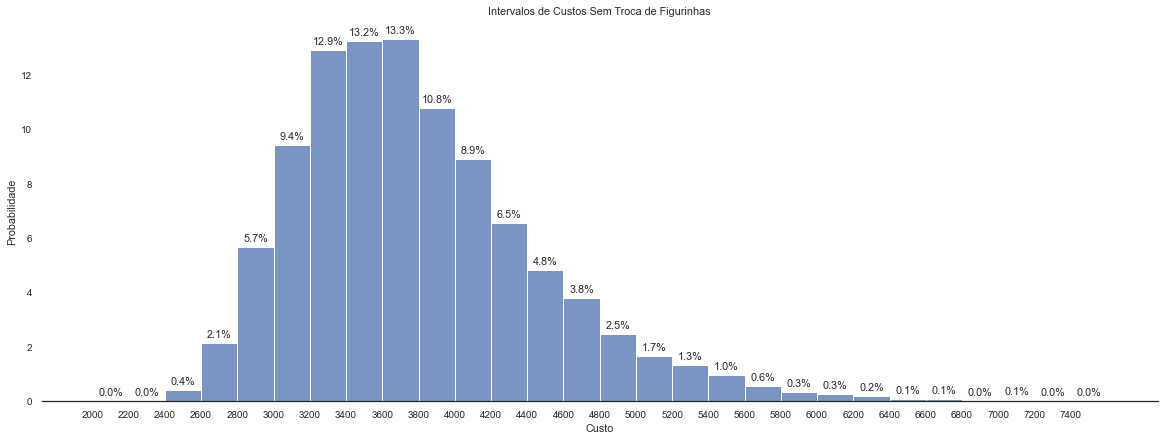

In [12]:
# Visualização de 10.000 cenários

# Define tamanho do gráfico
plt.figure(figsize=(20,7))
# Define estilo do gráfico
sns.set(style='white', font_scale=0.9)
# Gera histograma
ax = sns.histplot(run_10000['Custo Total'],stat = 'percent', binwidth=200, binrange = (2000,7600))
# Define as marcas de escala no eixo X
ax.set_xticks(range(2000,7600,200))
# Remove a linha do eixo Y
sns.despine(left=True)
# Define rótulos dos data points 
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, y = height + 0.2, s = '{:.1%}'.format(height/100), ha = 'center')
# Define rótulo do eixo Y
plt.ylabel('Probabilidade')
# Define rótulo do eixo X
plt.xlabel('Custo')
# Define título do gráfico
plt.title('Intervalos de Custos Sem Troca de Figurinhas')
# Exporta o png
plt.savefig('run_10000.png', dpi = 300)